## 1、什么是神经网络
我们以房价预测的案例来说明一下，把房屋的面积作为神经网络的输入（我们称之为𝑥），通过一个节点（一个小圆圈），最终输出了价格（我们用𝑦表示）。其实这个小圆圈就是一个单独的神经元，就像人的大脑神经元一样。如果这是一个 单神经元网络，不管规模大小，**它正是通过把这些单个神经元叠加在一起来形成。如果你把这些神经元想象成单独的乐高积木，你就通过搭积木来完成一个更大的神经网络。**

神经网络与大脑关联不大。这是一个过度简化的对比，把一个神经网络的逻辑单元和右边的生物神经元对比。至今为止其实连神经科学家们都很难解释，究竟一个神经元能做什么。

### 1.1 什么是感知器
这要从逻辑回归讲起，我们都知道逻辑回归的目标函数如下所示：
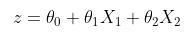
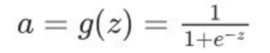
我们用网络来表示，这个网络就叫做感知器：
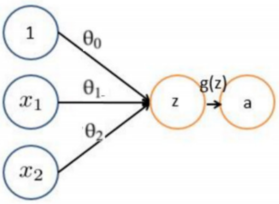
如果在这个感知器的基础上加上隐藏层，就会得到下面我们要说的神经网络结构了。

### 1.2 神经网络的结构
神经网络的一般结构是由输入层、隐藏层(神经元)、输出层构成的。隐藏层可以是1层或者多层叠加，层与层之间是相互连接的，如下图所示。
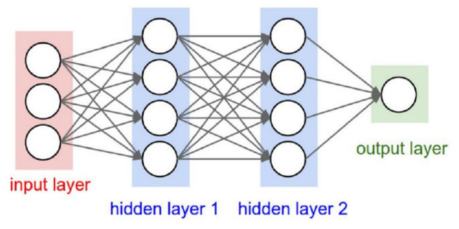

一般说到神经网络的层数是这样计算的，输入层不算，从隐藏层开始一直到输出层，一共有几层就代表着这是一个几层的神经网络，例如上图就是一个三层结构的神经网络。

**解释隐藏层的含义**： 在一个神经网络中，当你使用监督学习训练它的时候，训练集包含了输入𝑥也包含了目标输出𝑦，所以术语隐藏层的含义是在训练集中，这些中间结点的准确值我们是不知道到的，也就是说你看不见它们在训练集中应具有的值。

- 多隐藏层的神经网络比 单隐藏层的神经网络工程效果好很多。
- 提升隐层层数或者隐层神经元个数，神经网络“容量”会变大，空间表达力会变强。
- 过多的隐层和神经元节点，会带来过拟合问题。
- 不要试图通过降低神经网络参数量来减缓过拟合，用正则化或者dropout。

### 1.3 为什么神经网络具有非线性切分能力
假设对下图进行分类，圆圈为一类，红叉叉为另一类，如果用线性切分的话无论如何都不能把它们进行分开。
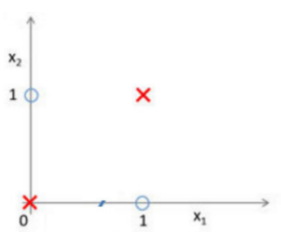

这时，引入神经网络(2层神经网络)，包含一个隐藏层，在隐藏层中,分别得到了P1和P2的图形，P1这条线以上的部分都是红叉叉，P2这条线以下的部分都是红叉叉，两个神经元就有2条线性直线。从隐藏层到输出层要做的事情就是把这两条直线给合并起来，就会得到h(x)的图形，也就是说P1以上的空间交上P2以下的空间就是红叉叉的分类，其余空间分类为圆圈。这就使得原本不能够线性切分变成非线性切分了。
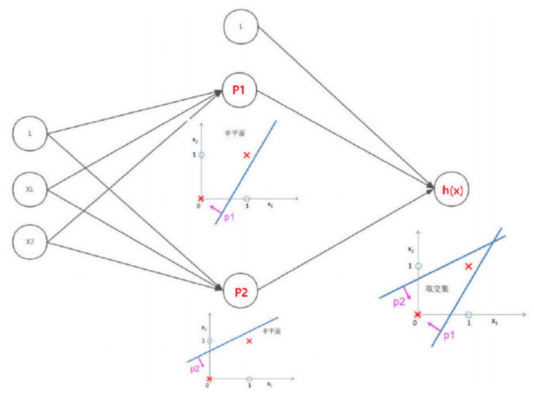

## 2. 神经网络的计算过程
### 2.1 计算过程
如下图所示。用圆圈表示神经网络的计算单元，逻辑回归的计算有两个步骤，首先你按步骤计算出𝑧，然后在第二 步中你以 sigmoid 函数为激活函数计算𝑧（得出𝑎），一个神经网络只是这样子做了好多次重复计算。
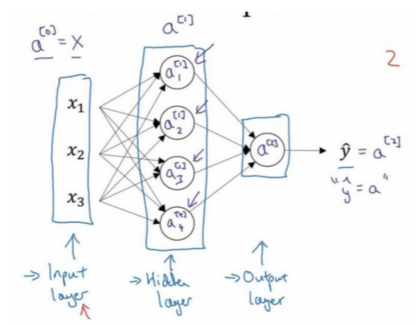

其中的一个神经元计算如下图所示：
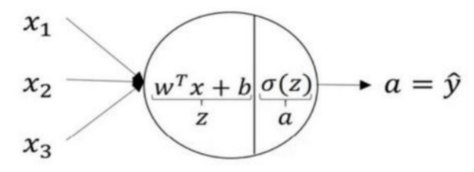

**向量化计算**，如果你执行神经网络的程序，用 for 循环来做这些看起来真的很低效。

所以接下来我们要做的就是把这四个等式向量化。向量化的过程是将神经网络中的一层神经元参数纵向堆积起来，例如隐藏层中的𝑤纵向堆积起来变成一个(4,3)的矩阵，用符号𝑊[1]表示。另一个看待这个的方法是我们有四个逻辑回归单元，且每一个逻辑回归单元都有相对应的参数——向量𝑤，把这四个向量堆积在一起，你会得出这 4×3 的矩阵。
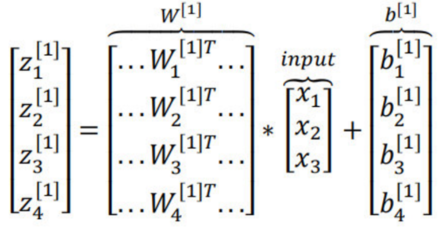

上面公式表示的是一个样本的向量化计算，那么多样本向量化计算其实就是在上面公式的基础上再增列数，每一列相当于一个样本。


### 2.2 随机初始化模型参数
在神经⽹络中，通常需要随机初始化模型参数。下⾯我们来解释这样做的原因。

假设输出层只保留⼀个输出单元*o*1（删去*o*2和*o*3以及指向它们的箭头），且隐藏层使⽤相同的激活函数。如果将每个隐藏单元的参数都初始化为相等的值，那么在正向传播时每个隐藏单元将根据相同的输⼊计算出相同的值， 并传递⾄输出层。在反向传播中，每个隐藏单元的参数梯度值相等。因此，这些参数在使⽤基于梯度的优化算法迭代后值依然相等。之后的迭代也是如此。

在这种情况下，⽆论隐藏单元有多少， 隐藏层本质上只有1个隐藏单元在发挥作⽤。因此，正如在前⾯的实验中所做的那样，我们通常将神经⽹络的模型参数，特别是权重参数，进⾏随机初始化。

有两种初始化方法：
1. 采用正态分布的随机初始化方法。
2. Xavier初始化方法：假设某全连接层的输入个数为a，输出个数为b，Xavier随机初始化将使该层中权重参数的每个元素都随机采样于均匀分布：
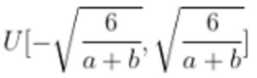
初始化后，每层输出的方差不会受该层输入个数的影响，且每层梯度的方差也不受该层输出个数的影响。

### 2.3 激活函数
#### 2.3.1 激活函数有哪些
在隐层接一个线性变换后 ，再接一个非线性变换(如sigmoid)，这个非线性变换叫做传递函数或者激活函数。上面的例子用的都是逻辑回归的Sigmoid激活函数，如果还不明白激活函数在哪，可以看下面这幅图。
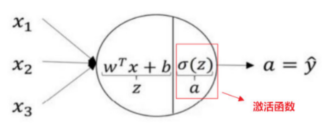

1、sigmoid函数:
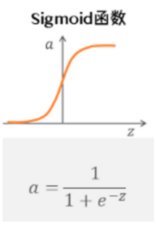
sigmoid值域[0,1]之间

2、tanh(双曲正切)函数:
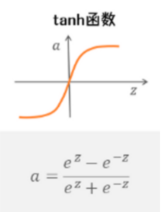

事实上，tanh函数是 sigmoid的向下平移和伸缩后的结果。对它进行了变形后，穿过了(0,0)点，并且值域介于+1 和-1 之间。但有一个例外：在二分类的问题中，对于输出层，因为𝑦的值是 0 或 1，所以想让𝑦^的数值介于0和1之间，而不是在-1和+1之间。所以需要使用sigmoid激活函数。

3、ReLu(修正线性单元)函数:
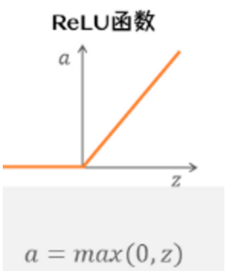

只要𝑧是正值的情况下，导数恒等于 1，当𝑧是负 值的时候，导数恒等于 0。

这有一些选择激活函数的经验法则： 如果输出是 0、1 值（二分类问题），则输出层选择 **sigmoid**函数，然后其它的所有单元都选择 **Relu**函数。

4、softmax激活函数
- 非线性变换之前计算：
- 经过非线性变换，临时变量：
- 归一化
- $a^l$表示的就是第几个类别的概率值，这些**概率值和为1**

我们的激活函数都是接受单行数值输入，例如 **Sigmoid** 和 **ReLu** 激活函数，输入一个实数，输出一个实数。**Softmax** 激活函数的特殊之处在于，因为需要将所有可能的输出归一化，就需要输入一个向量，最后输出一个向量。

**hardmax** 函数会观察𝑧的元素，然后在𝑧中最大元素的位置放上 1，其它位置放上 0，**Softmax** 所做的从𝑧到这些概率的映射更为温和。

**Softmax** 回归将 **logistic** 回归推广到了两种分类以上。

#### 2.3.2 激活函数优缺点
- 在𝑧的区间变动很大的情况下，激活函数的导数或者激活函数的斜率都会远大于0，在程序实现就是一个 if-else 语句，而 sigmoid 函数需要进行浮点四则运算，在实践中，使用 ReLu 激活函数神经网络通常会比使用 sigmoid 或者 tanh 激活函数学习的更快。
- sigmoid 和 tanh 函数的导数在正负饱和区的梯度都会接近于 0，这会造成梯度弥散，而 Relu 和 Leaky ReLu 函数大于 0 部分都为常数，不会产生梯度弥散现象。(同时应该注意到的是，Relu 进入负半区的时候，梯度为 0，神经元此时不会训练，产生所谓的稀疏性，而 Leaky ReLu 不会有这问题) 𝑧在 ReLu 的梯度一半都是 0，但是，有足够的隐藏层使得 z 值大于 0，所以对大多数的 训练数据来说学习过程仍然可以很快。

#### 2.3.3 为什么使用激活函数
如果你使用线性激活函数或者没有使用一个激活函数，那么无论你的神经网络有多少层一直在做的只是计算线性函数，所以不如直接去掉全部隐藏层。在我们的简明案例中，事实证明如果你在隐藏层用线性激活函数，在输出层用 **sigmoid**函数，那么这个模型的复杂度和没有任何隐藏层。的标准 **Logistic**回归是一样的。

在这里线性隐层一点用也没有，因为这两个线性函数的组合本身就是线性函数，所以除非你引入非线性，否则你无法计算更有趣的函数，即使你的网络层数再多也不行。

#### 2.3.4 人工神经网络中为什么ReLu要好过于tanh和sigmoid function？
1. 采用sigmoid等函数，算激活函数时（指数运算），计算量大，反向传播求误差梯度时，求导涉及除法和指数运算，计算量相对大，而采用Relu激活函数，整个过程的计算量节省很多。

2. 对于深层网络，sigmoid函数反向传播时，很容易就会出现梯度消失的情况（在sigmoid接近饱和区时，变换太缓慢，导数趋于0，这种情况会造成信息丢失），这种现象称为饱和，从而无法完成深层网络的训练。而ReLU就不会有饱和倾向，不会有特别小的梯度出现。

3. Relu会使一部分神经元的输出为0，这样就造成了网络的稀疏性，并且减少了参数的相互依存关系，缓解了过拟合问题的发生（以及一些人的生物解释balabala）。当然现在也有一些对relu的改进，比如prelu，random relu等，在不同的数据集上会有一些训练速度上或者准确率上的改进，具体的大家可以找相关的paper看。

#### 2.3.5 激活函数有哪些性质？
正向传播(forward-propagation)是指对神经网络沿着从输入层到输出层的顺序，依次计算并存储模型的中间变量(包括输出)。

逻辑回归的计算步骤：所以回想当时我们讨论逻辑回归的时候，我们有这个正向传播步骤，其中我们计算𝑧，然后𝑎，然后损失函数𝐿。 正向传播类似，计算，再计算，最后得到**loss function**。

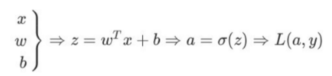

### 2.5 反向传播(BP)
反向传播(back-propagation)指的是计算神经网络参数梯度的方法。总的来说，反向传播依据微积分中的链式法则，沿着从输出层到输入层的顺序，依次计算并存储目标函数有关神经网络各层的中间变量以及参数的梯度。

由正向传播经过所有的隐藏层到达输出层，会得到一个输出结果$O_L$，然后根据这个$O_L$带入**loss funcation**中，利用SGD算法进行最优化求解，其中每次梯度下降都会使用一次BP来更新各个网络层中的参数值，这就是BP回传误差的意思。

- 正向传播求损失，BP回传误差。
- 根据误差信号修正每层的权重。对各个w进行求导，然后更新各个w。
- **链式依赖损失函数**：$y = h(g(f(x)))$

### 2.6 随机梯度下降法(SGD)
#### 2.6.1 mini-batch梯度下降
你可以把训练集分割为小一点的子集训练，这些子集被取名为 **mini-batch**，假设每一个子集中只有 1000 个样本，那么把其中的𝑥 (1)到𝑥 (1000)取出来，将其称为第一个子训练集，也叫做 **mini-batch**，然后你再取出接下来的 1000 个样本，从𝑥 (1001)到𝑥 (2000)，然后再取 1000个样本，以此类推。

在训练集上运行 **mini-batch** 梯度下降法，你运行 for t=1……5000，因为我们有5000个各有 1000 个样本的组，在 **for** 循环里你要做得基本就是对𝑋 {𝑡}和𝑌 {𝑡}执行一步梯度下降法。
- batch_size=1，就是SGD。
- batch_size=n，就是mini-batch
- batch_size=m，就是batch
其中1<n<m，m表示整个训练集大小。

**优缺点：**

- batch：相对噪声低些，幅度也大一些，你可以继续找最小值。
- SGD：大部分时候你向着全局最小值靠近，有时候你会远离最小值，因为那个样本恰好给你指的方向不对，因此随机梯度下降法是有很多噪声的，平均来看，它最终会靠近最小值，不过有时候也会方向错误，因为随机梯度下降法永远不会收敛，而是会一直在最小值附近波动。一次性只处理了一个训练样本，这样效率过于低下。
- mini-batch：实践中最好选择不大不小的 **mini-batch**，得到了大量向量化，效率高，收敛快。

首先，如果训练集较小，直接使用 batch 梯度下降法，这里的少是说小于 2000 个样本。一般的 mini-batch 大小为 64 到 512，考虑到电脑内存设置和使用的方式，如果 mini-batch 大小是 2 的𝑛次方，代码会运行地快一些

### 2.6.2 调节 Batch_Size 对训练效果影响到底如何？
1. Batch_Size 太小，模型表现效果极其糟糕(error飙升)。
2. 随着 Batch_Size 增大，处理相同数据量的速度越快。达到相同精度所需要的 epoch 数量越来越多。
3. 由于上述两种因素的矛盾， Batch_Size 增大到某个时候，达到时间上的最优。
4. 随着 Batch_Size 增大，最终收敛精度会陷入不同的局部极值.

## 3. 为什么说神经网络是端到端的网络?
端到端学习(end-to-end)是一种解决问题的思路，与之对应的是多步骤解决问题，也就是将一个问题拆分为多个步骤分步解决，而端到端是由输入端的数据直接得到输出端的结果。

就是不要预处理和特征提取，直接把原始数据扔进去得到最终结果。

**特征提取包含在神经网络内部**，所以说神经网络是端到端的网络。

**优点**：

通过缩减人工预处理和后续处理，尽可能使模型从原始输入到最终输出，给模型更多可以根据数据自动调节的空间，增加模型的整体契合度。

**缺点**

- 它可能需要大量的数据。要直接学到这个𝑥到𝑦的映射，你可能需要大量(𝑥, 𝑦)数据。
- 它排除了可能有用的手工设计组件。

## 4. softmax分类器
### 4.1 什么是softmax
在图像分类的情景中，softmax分类器输出可以是一个图像类别的离散值，和线性回归不同的是，**softmax输出单元从一个变成了多个。**

softmax回归和线性回归一样将输入特征与权重做线性叠加。与线性回归的一个主要不同在于，softmax回归的输出值个数等于标签里的类别数。下图是用神经网络描绘了softmax回归，也是一个单层神经网络，由于每个输出$o_1,o_2,o_3$ 的计算都要依赖于所有的输入$x_1,x_2,x_3,x_4$ ，softmax回归的输出层也是一个全连接层。
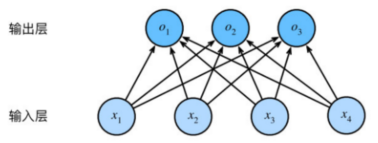
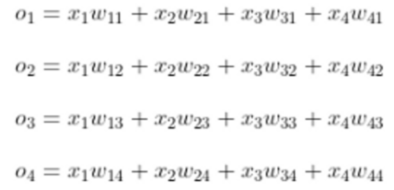

### 4.2 softmax的计算
一个简单的办法是将输出值 当做预测类别是i的置信度，并将值最大的输出所对应的类别作为预测输出。例如，如果$o_1,o_2,o_3$分别为0.1 ; 10 ; 0.1，由于$o_2$最大，那么预测类别为2。

然而，直接使用输出层的输出会有两个问题：

- 由于输出层的输出值的范围不确定，我们难以直观上判断这些值得意义。
- 由于真实标签是离散值，这些离散值与不确定范围的输出值之间的误差难以衡量。

softmax运算解决了以上两个问题。它通过下面的公式将输出值变换成值为正且和为1的概率分布：
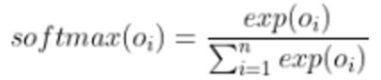

### 4.3 交叉熵损失函数
我们已经知道，softmax运算将输出变换成一个合法的类别预测分布。实际上，真实标签也可以用类别分布表达：

对于样本i，我们构造向量$y^{(i)} \in R^q$ ，使其第$y^{(i)}$个元素为1，其余为0。这样我们的训练目标可以设为使预测概率分布$\hat y^{(i)}$ 尽可能接近真实的标签概率$y^{(i)}$。

想要预测分类结果正确，我们其实并不需要预测概率完全等于标签概率，而平方损失则过于严格。改善这个问题的一个方法是使用更适合衡量两个概率分布差异的测量函数。其中，交叉熵(cross entropy)是一个常用的衡量方法：
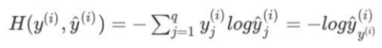

其中带下标的$y_j^{(i)}$是向量$y^{(i)}$中非 0 即 1 的元素。也就是说，交叉熵只关心对正确类别的预测概率，因为只要其值足够大，就可以确保分类结果正确。即最小化交叉熵损失函数等价于最大化训练数据集所有标签类别的联合预测概率


## 5.正则化
### 5.1 dropout正则化
所谓的Dropout指的是在用前向传播算法和反向传播算法训练DNN模型时，一批数据迭代时，随机的从全连接DNN网络中去掉一部分隐藏层的神经元。

比如我们本来的DNN模型对应的结构是这样的：
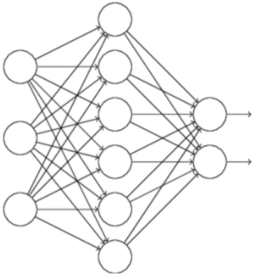

在对训练集中的一批数据进行训练时，我们随机去掉一部分隐藏层的神经元，并用去掉隐藏层的神经元的网络来拟合我们的一批训练数据。如下图，去掉了一半的隐藏层神经元：

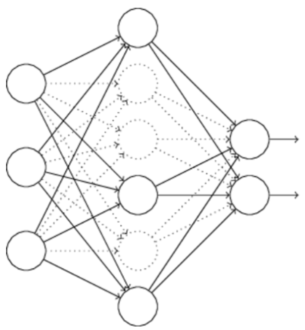

然后用这个去掉隐藏层的神经元的网络来进行一轮迭代，更新所有的W,b。这就是所谓的dropout。

当然，dropout并不意味着这些神经元永远的消失了。在下一批数据迭代前，我们会把DNN模型恢复成最初的全连接模型，然后用随机的方法去掉部分隐藏层的神经元，接着去迭代更新W,b。当然，这次用随机的方法去掉部分隐藏层后的残缺DNN网络和上次的残缺DNN网络并不相同。

**总结下dropout的方法**： 每轮梯度下降迭代时，它需要将训练数据分成若干批，然后分批进行迭代，每批数据迭代时，需要将原始的DNN模型随机去掉部分隐藏层的神经元，用残缺的DNN模型来迭代更新W,b。每批数据迭代更新完毕后，要将残缺的DNN模型恢复成原始的DNN模型。

### 5.2 数据增强正则化
增强模型泛化能力最好的办法是有更多更多的训练数据，但是在实际应用中，更多的训练数据往往很难得到。有时候我们不得不去自己想办法能无中生有，来增加训练数据集，进而得到让模型泛化能力更强的目的。

对于DNN擅长的领域，比如图像识别，语音识别等则是有办法的。以图像识别领域为例，对于原始的数据集中的图像，我们可以将原始图像稍微的平移或者旋转一点点，则得到了一个新的图像。虽然这是一个新的图像，即样本的特征是新的，但是我们知道对应的特征输出和之前未平移旋转的图像是一样的。

## 6、MLP
- PyTorch 2.0
- dataset:minist

In [4]:
import torch
import torch.utils.data
from torch import optim, nn
from torchvision import datasets
from torchvision.transforms import transforms
import torch.nn.functional as F

batch_size = 200
learning_rate = 0.001
epochs = 20

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('mnistdata', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('mnistdata', train=False, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=batch_size, shuffle=True)


class MLP(nn.Module):

    def __init__(self):
        super(MLP, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(784, 200),
            nn.LeakyReLU(inplace=True),
            nn.Linear(200, 200),
            nn.LeakyReLU(inplace=True),
            nn.Linear(200, 10),
            nn.LeakyReLU(inplace=True)
        )

    def forward(self, x):
        x = self.model(x)

        return x


device = torch.device('cpu:0')
#GPU
#device = torch.device('cuda:0')
net = MLP().to(device)

optimizer = optim.Adam(net.parameters(), lr=learning_rate)
criteon = nn.CrossEntropyLoss().to(device)

for epoch in range(epochs):

    for batch_idx, (data, target) in enumerate(train_loader):

        data = data.view(-1, 28*28)
        data, target = data.to(device), target.to(device)

        logits = net(data)
        loss = criteon(logits, target)

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()

        if batch_idx % 100 == 0:
            print('Train Epoch : {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx*len(data), len(train_loader.dataset),
                100.*batch_idx/len(train_loader), loss.item()
            ))

    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data = data.view(-1, 28*28)
        data, target = data.to(device), target.to(device)
        logits = net(data)
        test_loss += criteon(logits, target).item()

        pred = logits.data.max(1)[1]
        correct += pred.eq(target.data).sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set : Averge loss: {:.4f}, Accurancy: {}/{}({:.3f}%)'.format(
        test_loss, correct, len(test_loader.dataset),
        100.*correct/len(test_loader.dataset)
        ))

Train Epoch : 0 [0/60000 (0%)]	Loss: 2.296720
Train Epoch : 0 [20000/60000 (33%)]	Loss: 0.260761
Train Epoch : 0 [40000/60000 (67%)]	Loss: 0.176814

Test set : Averge loss: 0.0008, Accurancy: 9534/10000(95.340%)
Train Epoch : 1 [0/60000 (0%)]	Loss: 0.094196
Train Epoch : 1 [20000/60000 (33%)]	Loss: 0.136156
Train Epoch : 1 [40000/60000 (67%)]	Loss: 0.082310

Test set : Averge loss: 0.0005, Accurancy: 9688/10000(96.880%)
Train Epoch : 2 [0/60000 (0%)]	Loss: 0.065936
Train Epoch : 2 [20000/60000 (33%)]	Loss: 0.048159
Train Epoch : 2 [40000/60000 (67%)]	Loss: 0.130031

Test set : Averge loss: 0.0004, Accurancy: 9757/10000(97.570%)
Train Epoch : 3 [0/60000 (0%)]	Loss: 0.068877
Train Epoch : 3 [20000/60000 (33%)]	Loss: 0.077522
Train Epoch : 3 [40000/60000 (67%)]	Loss: 0.056981

Test set : Averge loss: 0.0003, Accurancy: 9793/10000(97.930%)
Train Epoch : 4 [0/60000 (0%)]	Loss: 0.029660
Train Epoch : 4 [20000/60000 (33%)]	Loss: 0.053377
Train Epoch : 4 [40000/60000 (67%)]	Loss: 0.026240

Tes